In [19]:
import os

DATA_FOLDER = os.path.abspath(os.path.join('..', 'data'))
FIGURE_FOLDER = os.path.abspath(os.path.join('..', 'figures'))

notebook_name = '050_run_cdna_keras_genomics'

data_folder = os.path.join(DATA_FOLDER, notebook_name)
figure_folder = os.path.join(FIGURE_FOLDER, notebook_name)

! mkdir -p $data_folder
! mkdir -p $figure_folder

input_folder = os.path.join(DATA_FOLDER, '023_make_train_valid_test_sets')

In [20]:
data_folder

'/src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics'

In [21]:
input_folder

'/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets'

In [22]:
ls -lha $input_folder

total 25M
drwxr-xr-x  2 root root 4.0K May 26 03:21 ./
drwxrwxr-x 17 2002 2002 4.0K May 29 16:41 ../
-rw-r--r--  1 root root  16K May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.target.tsv.test
-rw-r--r--  1 root root  53K May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.target.tsv.train
-rw-r--r--  1 root root 7.6K May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.target.tsv.valid
-rw-r--r--  1 root root 2.9M May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.test
-rw-r--r--  1 root root 9.9M May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.train
-rw-r--r--  1 root root 1.5M May 26 03:21 Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.valid
-rw-r--r--  1 root root 7.1K May 26 03:21 Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.last450.target.tsv.test
-rw-r--r--  1 root root  25K May 26 03:21 Homo_sapiens.GRCh38.cds.all.fa.nuclear_o

In [23]:
! head $input_folder/*

==> /src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.target.tsv.test <==
0	1
0	1
1	0
0	1
0	1
0	1
0	1
0	1
0	1
0	1

==> /src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.target.tsv.train <==
0	1
1	0
0	1
0	1
0	1
0	1
0	1
0	1
1	0
0	1

==> /src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.target.tsv.valid <==
1	0
1	0
1	0
1	0
0	1
0	1
1	0
0	1
0	1
1	0

==> /src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.test <==
>ENST00000550053.5 cdna chromosome:GRCh38:12:105107715:105169130:1 gene:ENSG00000136051.14 gene_biotype:protein_coding transcript_biotype:nonsense_mediated_decay gene_symbol:WASHC4 description:WASH complex subunit 4 [Source:HGNC Symbol;Ac

In [24]:
# from tensorflow.python.client import device_lib ; print(device_lib.list_local_devices())

In [30]:
%%bash -s "input_folder='$input_folder'; echo input_folder: $input_folder"

data_folder=/src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics
input_folder=/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets
EXPT_DIR=$data_folder/cdna_expt01

PREFIX='Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.last450'

for dtype in 'train' 'valid' 'test'
do
    echo Making $dtype dataset ...
    echo "\tCommand: python /src/myhome/code/Keras-genomics/embedH5.py \
        $input_folder/$PREFIX.$dtype \
        $input_folder/$PREFIX.target.tsv.$dtype \
        $EXPT_DIR/$dtype.h5"
    python /src/myhome/code/Keras-genomics/embedH5.py \
        $input_folder/$PREFIX.$dtype \
        $input_folder/$PREFIX.target.tsv.$dtype \
        $EXPT_DIR/$dtype.h5
done

Making train dataset ...
\tCommand: python /src/myhome/code/Keras-genomics/embedH5.py         /src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.last450.train         /src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.last450.target.tsv.train         /src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/train.h5
args: Namespace(batch=5000, dataname='data', infile='/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.last450.train', infile2='', isseq='Y', labelfile='/src/myhome/code/sequence-localization/data/023_make_train_valid_test_sets/Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.last450.target.tsv.train', labelname='label', maniprefix='/data', mapperfile='', outfile='/src/myhome/code/sequence-localization/data/050_r

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [31]:
# %run -d -b 40 /src/myhome/code/Keras-genomics/embedH5.py /src/myhome/code/sequence-localization/data/022_make_train_valid_test_sets/Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.test         /src/myhome/code/sequence-localization/data/022_make_train_valid_test_sets/Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.target.tsv.test         /src/myhome/code/sequence-localization/data/040_run_cdna_keras_genomics/cdna_expt01/test.h5

In [32]:
! pip install future

mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.
hyperas 0.4 requires jupyter, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.


In [33]:
! python /src/myhome/code/Keras-genomics/main.py -d $data_folder/cdna_expt01 -m /src/myhome/code/Keras-genomics/example/model.py -y -t -e

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Reading /src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/train.h5.batch1 ...
Reading /src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/train.h5.batch2 ...
Reading /src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/valid.h5.batch1 ...

*** 9 configurations x 2.2 iterations each

1 | Tue May 29 16:57:46 2018 | lowest loss so far: inf (run -1)

iterations: 2.2222222222222223
{'DELTA': 1e-08, 'DROPOUT': 0.5, 'MOMENT': 0.9}

Train on 6311 samples, validate on 902 samples
Epoch 1/2
2018-05-29 16:57:46.631832: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your C

6311/6311 [==============================] - 1s 209us/step - loss: 0.7367 - acc: 0.6086 - val_loss: 0.6674 - val_acc: 0.6231
Epoch 2/2
902/902 [==============================] - 0s 74us/step

3 seconds.

*** 3.0 configurations x 6.7 iterations each

10 | Tue May 29 16:58:12 2018 | lowest loss so far: 0.6625 (run 2)

iterations: 6.666666666666667
{'DELTA': 1e-06, 'DROPOUT': 0.75, 'MOMENT': 0.999}

Train on 6311 samples, validate on 902 samples
Epoch 1/7
6311/6311 [==============================] - 1s 209us/step - loss: 0.6908 - acc: 0.6110 - val_loss: 0.6626 - val_acc: 0.6231
Epoch 2/7
6311/6311 [==============================] - 0s 79us/step - loss: 0.6657 - acc: 0.6175 - val_loss: 0.6632 - val_acc: 0.6231
Epoch 3/7
6311/6311 [==============================] - 1s 84us/step - loss: 0.6655 - acc: 0.6175 - val_loss: 0.6626 - val_acc: 0.6231
Epoch 4/7
902/902 [==============================] - 0s 78us/step

4 seconds.

11 | Tue May 29 16:58:15 2018 | lowest loss so far: 0.6625 (run 2)

ite

Train on 6311 samples, validate on 902 samples
Epoch 1/20
6311/6311 [==============================] - 2s 301us/step - loss: 0.6901 - categorical_accuracy: 0.6083 - val_loss: 0.6626 - val_categorical_accuracy: 0.6231

Epoch 00001: val_loss improved from inf to 0.66264, saving model to /src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/model/model_bestmodel_weights.h5
Epoch 2/20
6311/6311 [==============================] - 1s 83us/step - loss: 0.6656 - categorical_accuracy: 0.6175 - val_loss: 0.6636 - val_categorical_accuracy: 0.6231

Epoch 00002: val_loss did not improve from 0.66264
Epoch 3/20
6311/6311 [==============================] - 1s 83us/step - loss: 0.6655 - categorical_accuracy: 0.6175 - val_loss: 0.6637 - val_categorical_accuracy: 0.6231

Epoch 00003: val_loss did not improve from 0.66264
Epoch 4/20
6311/6311 [==============================] - 1s 82us/step - loss: 0.6656 - categorical_accuracy: 0.6175 - val_loss: 0.6646 - val_categorical_acc

In [34]:
# %run -d -b /src/myhome/code/Keras-genomics/hyperband.py:136 /src/myhome/code/Keras-genomics/main.py -d $data_folder/cdna_expt01 -m /src/myhome/code/Keras-genomics/example/model.py -y -t -e

In [12]:
! ls genome/hg38/**/*

genome/hg38/ensembl/data:
021_get_nucleus_cytoplasm_sequences

genome/hg38/ensembl/figures:
021_get_nucleus_cytoplasm_sequences

genome/hg38/ensembl/v92:


In [13]:
ls $data_folder/cdna_expt01

model/


In [35]:
! head $data_folder/cdna_expt01/*txt

==> /src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/test.txt <==
/data/cdna_expt01/test.h5.batch1

==> /src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/train.txt <==
/data/cdna_expt01/train.h5.batch1
/data/cdna_expt01/train.h5.batch2

==> /src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/valid.txt <==
/data/cdna_expt01/valid.h5.batch1


In [36]:
! ls ls $data_folder/cdna_expt01/model

ls: cannot access 'ls': No such file or directory
/src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/model:
model.traindone		    model_bestmodel_weights.h5
model.training_history.txt  model_eval.txt
model_best_archit.json	    model_lastmodel_weights.h5
model_best_optimer.pkl


In [37]:
! head $data_folder/cdna_expt01/model/*

==> /src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/model/model.traindone <==

==> /src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/model/model.training_history.txt <==
# loss	acc	val_loss	val_acc
6.900553009510418390e-01	6.083029614275371477e-01	6.626400782369457065e-01	6.230598563894199637e-01
6.655960167158879726e-01	6.174932686921024150e-01	6.635819829488276422e-01	6.230598563894199637e-01
6.655226258218354118e-01	6.174932652259473853e-01	6.636862794470099747e-01	6.230598563894199637e-01
6.655858703638819485e-01	6.174932674359754348e-01	6.646420160048288617e-01	6.230598563894199637e-01
6.657726568987584193e-01	6.174932675918106684e-01	6.636907570642271992e-01	6.230598563894199637e-01
6.657030518488278314e-01	6.174932636487051596e-01	6.625462935663379849e-01	6.230598563894199637e-01
6.656133598258275885e-01	6.174932629686965546e-01	6.625467955141004506e-01	6.230598563894199637e-01
6.656526960768992529e-01	6.17493

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

txt = os.path.join(data_folder, 'cdna_expt01', 'model', 'model.training_history.txt')
! ls $txt
training_history = pd.read_table(txt)
training_history.columns = training_history.columns.str.strip('# ')
print(training_history.shape)
training_history.head()

training_history_reset_index = training_history.reset_index()
training_history_reset_index = training_history_reset_index.rename(columns={'index': 'epoch'})
training_history_reset_index.head()

training_history_tidy = pd.melt(training_history_reset_index, id_vars='epoch')
print(training_history_tidy.shape)
training_history_tidy.head()

/src/myhome/code/sequence-localization/data/050_run_cdna_keras_genomics/cdna_expt01/model/model.training_history.txt
(18, 4)
(72, 3)


,epoch,variable,value
0,0,loss,0.690055
1,1,loss,0.665596
2,2,loss,0.665523
3,3,loss,0.665586
4,4,loss,0.665773


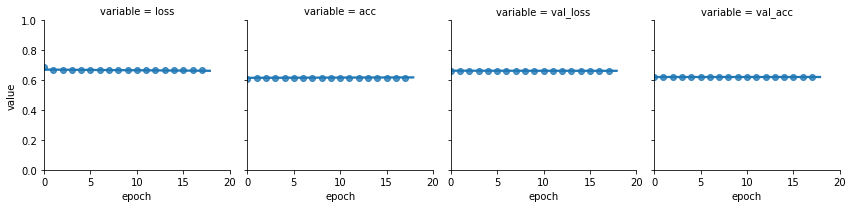

In [41]:
g = sns.FacetGrid(data=training_history_tidy, col='variable')
g.map(sns.regplot, 'epoch', 'value')
g.set(ylim=(0, 1), xlim=(0, 20))